###### importing data set from kaggle

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


###### reading the data set to dataframe

In [2]:
df=pd.read_csv("../input/titanic/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


###### checking for null values

In [3]:
Null=[]
for i in df:
    Null.append((i,df[i].isna().mean()*100))
Null=pd.DataFrame(Null,columns=['class','per'])
Null

,class,per
0,PassengerId,0.000000
1,Survived,0.000000
2,Pclass,0.000000
3,Name,0.000000
4,Sex,0.000000
5,Age,19.865320
6,SibSp,0.000000
7,Parch,0.000000
8,Ticket,0.000000
9,Fare,0.000000


##### we can remove canbin as it has 77% of null values
##### Name and Ticke will not be useful in decison making so we can drop them too

In [4]:
df=df.drop(["Cabin","Name","Ticket"],axis=1)
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

##### filling other na values with mode 

In [5]:
df=df.fillna(df.mode)
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

#### Handling Object data type

##### label encoding the Sex column

In [6]:
df.Sex.unique()

array(['male', 'female'], dtype=object)

In [7]:
df.Sex=df.Sex.replace("male",1)
df.Sex=df.Sex.replace("female",2)
df.Sex.unique()

array([1, 2])

##### in Embarked column values are stored with unwanted values shown below

In [8]:
df.Embarked = df.Embarked.apply(str)
k=df.Embarked.unique()
k[-1]

'<bound method DataFrame.mode of      PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \\\n0              1         0       3    male  22.0      1      0   7.2500   \n1              2         1       1  female  38.0      1      0  71.2833   \n2              3         1       3  female  26.0      0      0   7.9250   \n3              4         1       1  female  35.0      1      0  53.1000   \n4              5         0       3    male  35.0      0      0   8.0500   \n..           ...       ...     ...     ...   ...    ...    ...      ...   \n886          887         0       2    male  27.0      0      0  13.0000   \n887          888         1       1  female  19.0      0      0  30.0000   \n888          889         0       3  female   NaN      1      2  23.4500   \n889          890         1       1    male  26.0      0      0  30.0000   \n890          891         0       3    male  32.0      0      0   7.7500   \n\n    Embarked  \n0          S  \n1          C  \n2   

##### label encoding the column and replacing unwanted values with most frequent value i.e. 'S'

In [9]:
df.Embarked=df.Embarked.replace('S',1)
df.Embarked=df.Embarked.replace('C',2)
df.Embarked=df.Embarked.replace('Q',3)
df.Embarked=df.Embarked.replace(k[-1],1)

##### similar problem with Age attribute, so replacing the unk value with 28 and converting into float

In [10]:
df.Age=df.Age.apply(str)
k=df.Age.unique()
df.Age=df.Age.replace(k[4],"28.0")
df.Age=df.Age.apply(float)

##### correlation heatmap

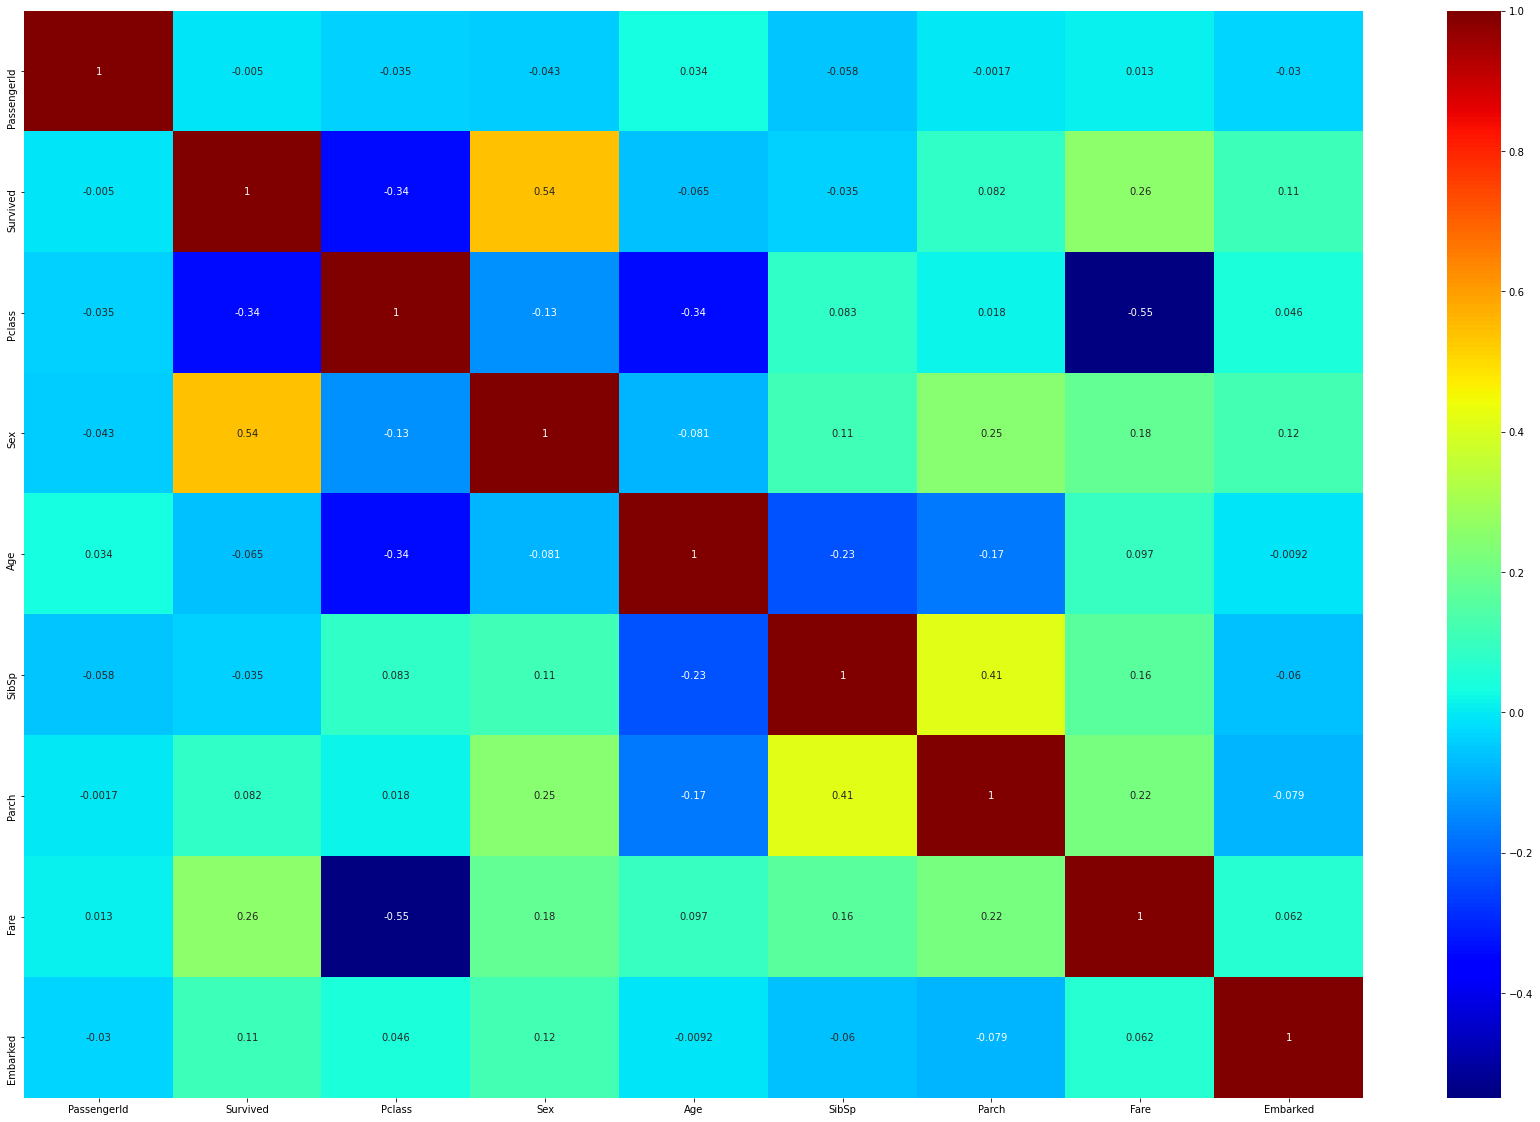

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot = True,cmap="jet")

##### seperating X and Y values

In [12]:
cols = [col for col in df.columns if col not in ["Survived"]]
X = df[cols]
y = df["Survived"]

##### stroring the feature used for training in l

In [13]:
l=list(X)

##### using Logirithmic Regression for fitting the model

In [14]:
from sklearn.linear_model import LogisticRegression as LR
model = LR()
model.fit(X,y)
model.score(X,y)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8013468013468014

##### inputing the test data and selecting required features

In [15]:
df=pd.read_csv("../input/titanic/test.csv")
l
df=df[l]

##### label encoding the Sex column

In [16]:
df.Sex=df.Sex.replace("male",1)
df.Sex=df.Sex.replace("female",2)
df.Sex.unique()

array([1, 2])

In [17]:
df.Embarked = df.Embarked.apply(str)
k=df.Embarked.unique()

##### label encoding embarked column

In [18]:
df.Embarked=df.Embarked.replace('S',1)
df.Embarked=df.Embarked.replace('C',2)
df.Embarked=df.Embarked.replace('Q',3)

##### filling null values mode

In [19]:
df=df.fillna(df.mode)
df.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [20]:
df.dtypes

PassengerId     int64
Pclass          int64
Sex             int64
Age            object
SibSp           int64
Parch           int64
Fare           object
Embarked        int64
dtype: object

##### handling unkown or garbage values in Fare

In [21]:
df.Fare=df.Fare.apply(str)
df.Fare.unique()

array(['7.8292', '7.0', '9.6875', '8.6625', '12.2875', '9.225', '7.6292',
       '29.0', '7.2292', '24.15', '7.8958', '26.0', '82.2667', '61.175',
       '27.7208', '12.35', '7.225', '7.925', '59.4', '3.1708', '31.6833',
       '61.3792', '262.375', '14.5', '61.9792', '30.5', '21.6792', '31.5',
       '20.575', '23.45', '57.75', '8.05', '9.5', '56.4958', '13.4167',
       '26.55', '7.85', '13.0', '52.5542', '29.7', '7.75', '76.2917',
       '15.9', '60.0', '15.0333', '23.0', '263.0', '15.5792', '29.125',
       '7.65', '16.1', '13.5', '7.725', '21.0', '7.8792', '42.4',
       '28.5375', '211.5', '25.7', '15.2458', '221.7792', '10.7083',
       '14.4542', '13.9', '7.775', '52.0', '7.7958', '78.85', '7.8542',
       '55.4417', '8.5167', '22.525', '7.8208', '8.7125', '15.0458',
       '7.7792', '31.6792', '7.2833', '6.4375', '16.7', '75.2417',
       '15.75', '7.25', '23.25', '28.5', '25.4667', '46.9', '151.55',
       '18.0', '51.8625', '83.1583',
       '<bound method DataFrame.mode of 

In [22]:
s='<bound method DataFrame.mode of      PassengerId  Pclass  Sex   Age  SibSp  Parch      Fare  Embarked\n0            892       3    1  34.5      0      0    7.8292         3\n1            893       3    2  47.0      1      0    7.0000         1\n2            894       2    1  62.0      0      0    9.6875         3\n3            895       3    1  27.0      0      0    8.6625         1\n4            896       3    2  22.0      1      1   12.2875         1\n..           ...     ...  ...   ...    ...    ...       ...       ...\n413         1305       3    1   NaN      0      0    8.0500         1\n414         1306       1    2  39.0      0      0  108.9000         2\n415         1307       3    1  38.5      0      0    7.2500         1\n416         1308       3    1   NaN      0      0    8.0500         1\n417         1309       3    1   NaN      1      1   22.3583         2\n\n[418 rows x 8 columns]>'

##### replacing it with most frequent value 7.75

In [23]:
df.Fare=df.Fare.replace(s,'7.75')

##### converting fare to float datatye

In [24]:
df.Fare=df.Fare.apply(float)

##### replacing garbage value in age with 34.5

In [25]:
df.Age=df.Age.apply(str)
k=df.Age.unique()[10]
df.Age=df.Age.replace(k,"34.5")
df.Age=df.Age.apply(float)

##### predicting the test values

In [26]:
pred=model.predict(df)

In [27]:
Id=df.PassengerId.values
l=[]
for i ,j in zip(Id,pred):
    l.append([i,j])

##### converting them to a dataframe

In [28]:
sub=pd.DataFrame(l,columns=["PassengerId","Survived"])

In [29]:
sub

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


##### storing as a dataframe

In [30]:
filename = 'Titanic Predictions 1.csv'

sub.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Titanic Predictions 1.csv
